# Dataset name : Turbofan Engine Degradation Simulation Data Set

This dataset comprises of data that gives us information of when the turbofan engine fails and for that this dataset
provides various columns/features :-

    1.Unit                 : This tells us about the unit number of turbofan engine.
    2.Operational settings : These features tells us about different operational setting have been applied on the engine.
                             Their are total three operational settings for each cycle(Time).
    3.Sensor measurement   : These features gives the result of the effect of those operational 
                             setting's combination applied upon the engine. Their are total 26 measurements for 
                             each settings combinations.


The datasets which were provided to us are comprise 4 training dataset,4 testing dataset and 4 Y-label/dependent dataset for testing dataset. In theses dataset we have to do Exploratory Data Analysis(EDA) to visualize,analysis to know which of the features are important and more importantly to know what is EDA.

In [988]:
#In this cell all the libraries required for the EDA are imported down below.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [989]:
#Here we have loaded our Train Dataset(train_FD001) 
df = pd.read_csv("Desktop/train_FD001.txt",sep=" ",header=None)
#There were two columns filled with NaN values so dropping them.
print(df.columns)
for names in df.columns:
    
    if (df[names].isnull().sum() >1):
         df.drop(names,axis = 1,inplace = True)
#df.drop([26,27],axis = 1,inplace = True)
#The names of the columns were missing, proving headers to the column 
df.columns = ["unit","time(in cycles)","os1","os2","os3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19","sensor20","sensor21"] 
df.head()
print(df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')
Index(['unit', 'time(in cycles)', 'os1', 'os2', 'os3', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8',
       'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14',
       'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20',
       'sensor21'],
      dtype='object')


In [990]:
df.info()
#Here we can see all the columns are numerical typeand having non NULL values.
#Total rows = 20631 (0 to 20630)
#Total columns = 26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
unit               20631 non-null int64
time(in cycles)    20631 non-null int64
os1                20631 non-null float64
os2                20631 non-null float64
os3                20631 non-null float64
sensor1            20631 non-null float64
sensor2            20631 non-null float64
sensor3            20631 non-null float64
sensor4            20631 non-null float64
sensor5            20631 non-null float64
sensor6            20631 non-null float64
sensor7            20631 non-null float64
sensor8            20631 non-null float64
sensor9            20631 non-null float64
sensor10           20631 non-null float64
sensor11           20631 non-null float64
sensor12           20631 non-null float64
sensor13           20631 non-null float64
sensor14           20631 non-null float64
sensor15           20631 non-null float64
sensor16           20631 non-null float64
sensor17     

In [991]:
df.head()

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
0     1                1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70   
1     1                2  0.0019 -0.0003  100.0   518.67   642.15  1591.82   
2     1                3 -0.0043  0.0003  100.0   518.67   642.35  1587.99   
3     1                4  0.0007  0.0000  100.0   518.67   642.35  1582.79   
4     1                5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85   

   sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  sensor16  \
0  1400.60    14.62  ...    521.66   2388.02   8138.62    8.4195      0.03   
1  1403.14    14.62  ...    522.28   2388.07   8131.49    8.4318      0.03   
2  1404.20    14.62  ...    522.42   2388.03   8133.23    8.4178      0.03   
3  1401.87    14.62  ...    522.86   2388.08   8133.83    8.3682      0.03   
4  1406.22    14.62  ...    522.19   2388.04   8133.80    8.4294      0.03   

   sensor17  sensor18  sensor19  sensor20  sensor21  
0       392      2388     100.0     39.06   23.4190  
1       392      2388     100.0     39.00   23.4236  
2       390      2388     100.0     38.95   23.3442  
3       392      2388     100.0     38.88   23.3739  
4       393      2388     100.0     38.90   23.4044  

[5 rows x 26 columns]

In [992]:
df.describe().T
#here we can see among all the variables some of the variables are having constant values

count         mean           std        min        25%  \
unit             20631.0    51.506568  2.922763e+01     1.0000    26.0000   
time(in cycles)  20631.0   108.807862  6.888099e+01     1.0000    52.0000   
os1              20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015   
os2              20631.0     0.000002  2.930621e-04    -0.0006    -0.0002   
os3              20631.0   100.000000  0.000000e+00   100.0000   100.0000   
sensor1          20631.0   518.670000  6.537152e-11   518.6700   518.6700   
sensor2          20631.0   642.680934  5.000533e-01   641.2100   642.3250   
sensor3          20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600   
sensor4          20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600   
sensor5          20631.0    14.620000  3.394700e-12    14.6200    14.6200   
sensor6          20631.0    21.609803  1.388985e-03    21.6000    21.6100   
sensor7          20631.0   553.367711  8.850923e-01   549.8500   552.8100   
sensor8          20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500   
sensor9          20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000   
sensor10         20631.0     1.300000  4.660829e-13     1.3000     1.3000   
sensor11         20631.0    47.541168  2.670874e-01    46.8500    47.3500   
sensor12         20631.0   521.413470  7.375534e-01   518.6900   520.9600   
sensor13         20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400   
sensor14         20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450   
sensor15         20631.0     8.442146  3.750504e-02     8.3249     8.4149   
sensor16         20631.0     0.030000  1.556432e-14     0.0300     0.0300   
sensor17         20631.0   393.210654  1.548763e+00   388.0000   392.0000   
sensor18         20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000   
sensor19         20631.0   100.000000  0.000000e+00   100.0000   100.0000   
sensor20         20631.0    38.816271  1.807464e-01    38.1400    38.7000   
sensor21         20631.0    23.289705  1.082509e-01    22.8942    23.2218   

                       50%        75%        max  
unit               52.0000    77.0000   100.0000  
time(in cycles)   104.0000   156.0000   362.0000  
os1                 0.0000     0.0015     0.0087  
os2                 0.0000     0.0003     0.0006  
os3               100.0000   100.0000   100.0000  
sensor1           518.6700   518.6700   518.6700  
sensor2           642.6400   643.0000   644.5300  
sensor3          1590.1000  1594.3800  1616.9100  
sensor4          1408.0400  1414.5550  1441.4900  
sensor5            14.6200    14.6200    14.6200  
sensor6            21.6100    21.6100    21.6100  
sensor7           553.4400   554.0100   556.0600  
sensor8          2388.0900  2388.1400  2388.5600  
sensor9          9060.6600  9069.4200  9244.5900  
sensor10            1.3000     1.3000     1.3000  
sensor11           47.5100    47.7000    48.5300  
sensor12          521.4800   521.9500   523.3800  
sensor13         2388.0900  2388.1400  2388.5600  
sensor14         8140.5400  8148.3100  8293.7200  
sensor15            8.4389     8.4656     8.5848  
sensor16            0.0300     0.0300     0.0300  
sensor17          393.0000   394.0000   400.0000  
sensor18         2388.0000  2388.0000  2388.0000  
sensor19          100.0000   100.0000   100.0000  
sensor20           38.8300    38.9500    39.4300  
sensor21           23.2979    23.3668    23.6184

In [993]:
#but first in order to remove those columns we need to see what effect they are putting on the label column or, the dependent variables
#for that we need dependent variable
#from the article and readme provided we found out that their is a RUL file that contains a column which is actually a label column and it seems that it is a label/dependent column of test dataset
#there is no label variable for Train dataset so we have to build one i.e. RUL column

RUL means remaining useful life of component that means for how long that specific component will survive and our training dataset is run-to-failure dataset that means it is answering us that at this point of time/cycles the component will fail but is it dependent upon os or not that we will have to check

In [994]:
#First we have to find out what is the correlation of all the os and sensors
df1 = df.drop('unit',axis=1)
df1.corr()

time(in cycles)           os1           os2  os3  \
time(in cycles)     1.000000e+00 -4.526813e-03  1.613204e-02  NaN   
os1                -4.526813e-03  1.000000e+00  1.166044e-02  NaN   
os2                 1.613204e-02  1.166044e-02  1.000000e+00  NaN   
os3                          NaN           NaN           NaN  NaN   
sensor1             1.613386e-14 -1.669929e-16 -6.876180e-16  NaN   
sensor2             5.498980e-01  9.029868e-03  7.266242e-03  NaN   
sensor3             5.439470e-01 -5.651101e-03  9.067833e-03  NaN   
sensor4             6.245772e-01  9.543965e-03  1.467284e-02  NaN   
sensor5             1.259112e-14 -3.491551e-18  1.623640e-16  NaN   
sensor6             1.059800e-01 -1.340410e-03  1.435458e-02  NaN   
sensor7            -5.959136e-01 -9.437328e-03 -1.667790e-02  NaN   
sensor8             4.759773e-01 -4.266868e-04  1.328473e-02  NaN   
sensor9             4.439993e-01 -4.278809e-03 -5.424966e-03  NaN   
sensor10            1.517108e-14 -1.225395e-16  7.690888e-16  NaN   
sensor11            6.343845e-01  1.165784e-02  1.169038e-02  NaN   
sensor12           -6.113536e-01 -1.490795e-03 -1.092254e-02  NaN   
sensor13            4.775230e-01  2.317787e-03  1.815635e-02  NaN   
sensor14            3.703236e-01 -4.469388e-03 -6.310324e-03  NaN   
sensor15            5.886758e-01  7.651995e-03  1.415603e-02  NaN   
sensor16           -1.851264e-14  7.268383e-17  1.118654e-15  NaN   
sensor17            5.669949e-01  2.599198e-03  1.227979e-02  NaN   
sensor18                     NaN           NaN           NaN  NaN   
sensor19                     NaN           NaN           NaN  NaN   
sensor20           -5.835969e-01 -5.712625e-03 -1.055403e-02  NaN   
sensor21           -5.859234e-01 -1.455862e-02 -7.845559e-03  NaN   

                      sensor1       sensor2       sensor3       sensor4  \
time(in cycles)  1.613386e-14  5.498980e-01  5.439470e-01  6.245772e-01   
os1             -1.669929e-16  9.029868e-03 -5.651101e-03  9.543965e-03   
os2             -6.876180e-16  7.266242e-03  9.067833e-03  1.467284e-02   
os3                       NaN           NaN           NaN           NaN   
sensor1          1.000000e+00  8.476569e-12 -1.011335e-12  5.450136e-14   
sensor2          8.476569e-12  1.000000e+00  6.026096e-01  7.149492e-01   
sensor3         -1.011335e-12  6.026096e-01  1.000000e+00  6.784127e-01   
sensor4          5.450136e-14  7.149492e-01  6.784127e-01  1.000000e+00   
sensor5          1.000000e+00  8.475709e-12 -1.013618e-12  5.196257e-14   
sensor6          6.935511e-09  1.322425e-01  1.160394e-01  1.504801e-01   
sensor7          1.765402e-12 -7.021365e-01 -6.645953e-01 -7.931296e-01   
sensor8         -1.911824e-10  6.623250e-01  6.024805e-01  7.468516e-01   
sensor9          1.244204e-13  2.737642e-01  3.229644e-01  2.974286e-01   
sensor10         1.000000e+00  8.475712e-12 -1.013654e-12  5.136299e-14   
sensor11         1.109582e-12  7.400200e-01  6.959002e-01  8.301357e-01   
sensor12        -3.973188e-12 -7.245785e-01 -6.803068e-01 -8.155905e-01   
sensor13        -1.862063e-11  6.617924e-01  6.009632e-01  7.451584e-01   
sensor14        -1.576482e-12  1.797520e-01  2.371373e-01  1.907477e-01   
sensor15         4.884295e-13  6.759752e-01  6.399212e-01  7.584588e-01   
sensor16         1.000000e+00  8.476474e-12 -1.013957e-12  5.059435e-14   
sensor17         1.934015e-14  6.298856e-01  6.000172e-01  7.034991e-01   
sensor18                  NaN           NaN           NaN           NaN   
sensor19                  NaN           NaN           NaN           NaN   
sensor20        -7.467360e-13 -6.618407e-01 -6.259414e-01 -7.480672e-01   
sensor21        -5.996745e-13 -6.680502e-01 -6.339008e-01 -7.451931e-01   

                      sensor5       sensor6  ...      sensor12      sensor13  \
time(in cycles)  1.259112e-14  1.059800e-01  ... -6.113536e-01  4.775230e-01   
os1             -3.491551e-18 -1.340410e-03  ... -1.490795e-03  2.317787e-03   
os2              1.623640e-16  

In [995]:
#As we can see the colinearity techinque is not so helpful right now but we can see that os3,sensor18,19 are totally not 
#showing any value and previously we saw they were constant

In [996]:
#Now in order to check colinearity of these columns/feature with the label variable we need to create one Y-label variable 
df['RUL'] = df.groupby(['unit'])['time(in cycles)'].transform(max)-df['time(in cycles)']

In [997]:
df.head()

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
0     1                1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70   
1     1                2  0.0019 -0.0003  100.0   518.67   642.15  1591.82   
2     1                3 -0.0043  0.0003  100.0   518.67   642.35  1587.99   
3     1                4  0.0007  0.0000  100.0   518.67   642.35  1582.79   
4     1                5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85   

   sensor4  sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   sensor18  sensor19  sensor20  sensor21  RUL  
0      2388     100.0     39.06   23.4190  191  
1      2388     100.0     39.00   23.4236  190  
2      2388     100.0     38.95   23.3442  189  
3      2388     100.0     38.88   23.3739  188  
4      2388     100.0     38.90   23.4044  187  

[5 rows x 27 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


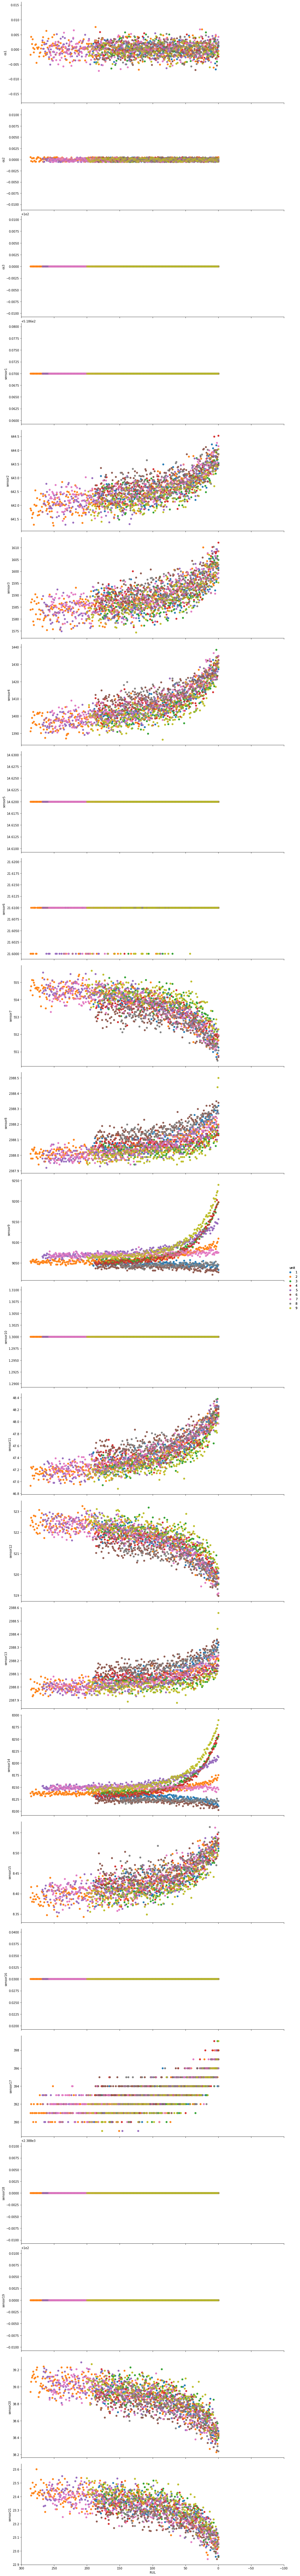

In [998]:
#Checking which all sensors are getting effected by the RUL column(Y-label) using pair plot
g = sns.pairplot(data=df[df['unit']<10] ,
                 y_vars=["os1","os2","os3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19","sensor20","sensor21"] ,
                 x_vars=['RUL'],
                 hue="unit", size=5, aspect=2.5)
g = g.map(plt.scatter, alpha=0.5)
g = g.set(xlim=(300,-100))
g = g.add_legend()

In [999]:
df.head()

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
0     1                1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70   
1     1                2  0.0019 -0.0003  100.0   518.67   642.15  1591.82   
2     1                3 -0.0043  0.0003  100.0   518.67   642.35  1587.99   
3     1                4  0.0007  0.0000  100.0   518.67   642.35  1582.79   
4     1                5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85   

   sensor4  sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   sensor18  sensor19  sensor20  sensor21  RUL  
0      2388     100.0     39.06   23.4190  191  
1      2388     100.0     39.00   23.4236  190  
2      2388     100.0     38.95   23.3442  189  
3      2388     100.0     38.88   23.3739  188  
4      2388     100.0     38.90   23.4044  187  

[5 rows x 27 columns]

In [1000]:
#dropping the below sensor columns as they are having constant value
for names in df.columns:
    if (df[names].nunique()==1):
        df.drop(names,axis = 1,inplace = True)

In [1001]:
dropped_columns = ["sensor1","sensor5","sensor10","sensor16","sensor18","sensor19","os3"]
df.head()

unit  time(in cycles)     os1     os2  sensor2  sensor3  sensor4  sensor6  \
0     1                1 -0.0007 -0.0004   641.82  1589.70  1400.60    21.61   
1     1                2  0.0019 -0.0003   642.15  1591.82  1403.14    21.61   
2     1                3 -0.0043  0.0003   642.35  1587.99  1404.20    21.61   
3     1                4  0.0007  0.0000   642.35  1582.79  1401.87    21.61   
4     1                5 -0.0019 -0.0002   642.37  1582.85  1406.22    21.61   

   sensor7  sensor8  sensor9  sensor11  sensor12  sensor13  sensor14  \
0   554.36  2388.06  9046.19     47.47    521.66   2388.02   8138.62   
1   553.75  2388.04  9044.07     47.49    522.28   2388.07   8131.49   
2   554.26  2388.08  9052.94     47.27    522.42   2388.03   8133.23   
3   554.45  2388.11  9049.48     47.13    522.86   2388.08   8133.83   
4   554.00  2388.06  9055.15     47.28    522.19   2388.04   8133.80   

   sensor15  sensor17  sensor20  sensor21  RUL  
0    8.4195       392     39.06   23.4190  191  
1    8.4318       392     39.00   23.4236  190  
2    8.4178       390     38.95   23.3442  189  
3    8.3682       392     38.88   23.3739  188  
4    8.4294       393     38.90   23.4044  187

Since OS1 and OS2 separately were having no effect so checking the effect with every available sensors.

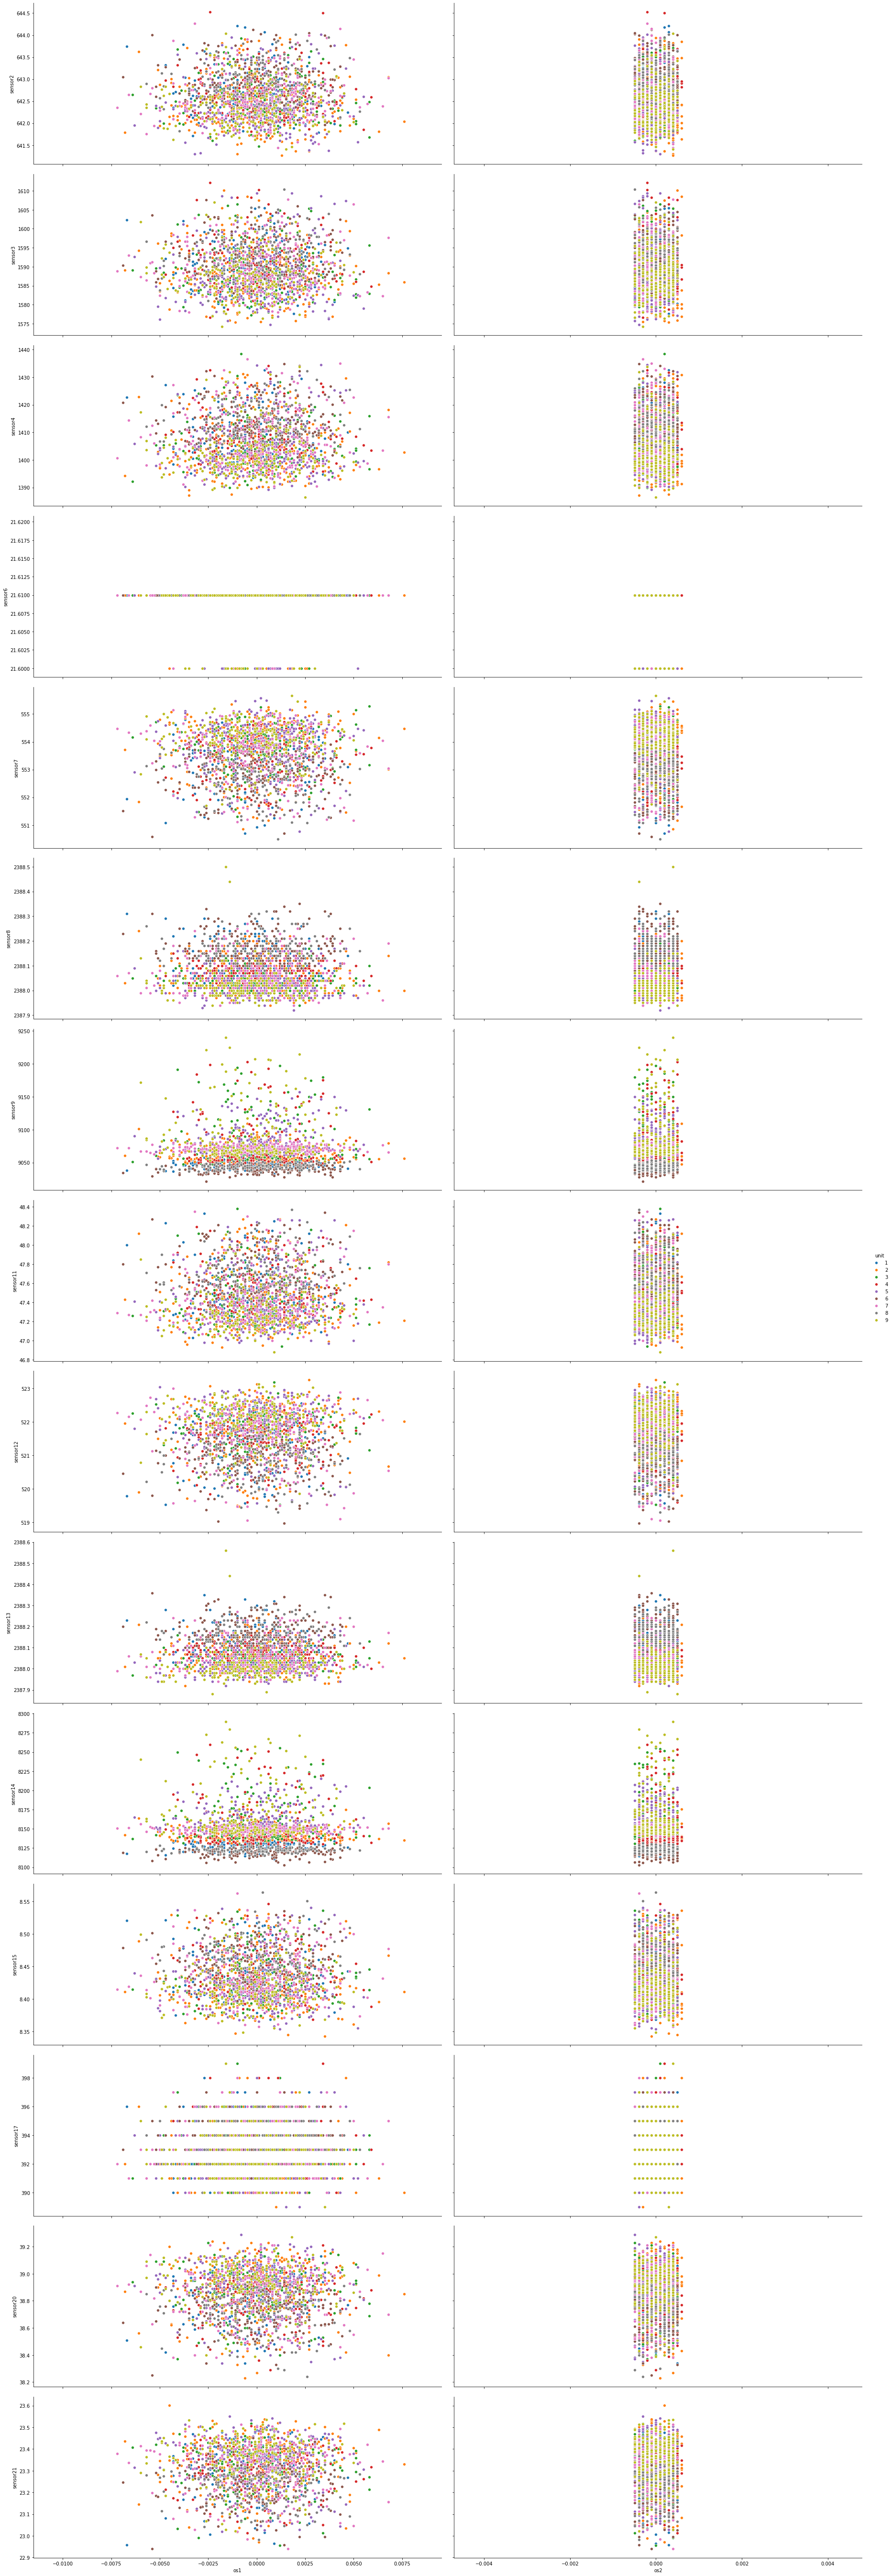

In [1002]:
#The checking has been done using pairplot.
g = sns.pairplot(data=df[df['unit']<10] ,
                 y_vars=["sensor2","sensor3","sensor4","sensor6","sensor7","sensor8","sensor9","sensor11","sensor12","sensor13","sensor14","sensor15","sensor17","sensor20","sensor21"] ,
                 x_vars=["os1","os2"],
                 hue="unit", size=5, aspect=2.5)

In [1003]:
df.tail()

unit  time(in cycles)     os1     os2  sensor2  sensor3  sensor4  \
20626   100              196 -0.0004 -0.0003   643.49  1597.98  1428.63   
20627   100              197 -0.0016 -0.0005   643.54  1604.50  1433.58   
20628   100              198  0.0004  0.0000   643.42  1602.46  1428.18   
20629   100              199 -0.0011  0.0003   643.23  1605.26  1426.53   
20630   100              200 -0.0032 -0.0005   643.85  1600.38  1432.14   

       sensor6  sensor7  sensor8  sensor9  sensor11  sensor12  sensor13  \
20626    21.61   551.43  2388.19  9065.52     48.07    519.49   2388.26   
20627    21.61   550.86  2388.23  9065.11     48.04    519.68   2388.22   
20628    21.61   550.94  2388.24  9065.90     48.09    520.01   2388.24   
20629    21.61   550.68  2388.25  9073.72     48.39    519.67   2388.23   
20630    21.61   550.79  2388.26  9061.48     48.20    519.30   2388.26   

       sensor14  sensor15  sensor17  sensor20  sensor21  RUL  
20626   8137.60    8.4956       397     38.49   22.9735    4  
20627   8136.50    8.5139       395     38.30   23.1594    3  
20628   8141.05    8.5646       398     38.44   22.9333    2  
20629   8139.29    8.5389       395     38.29   23.0640    1  
20630   8137.33    8.5036       396     38.37   23.0522    0

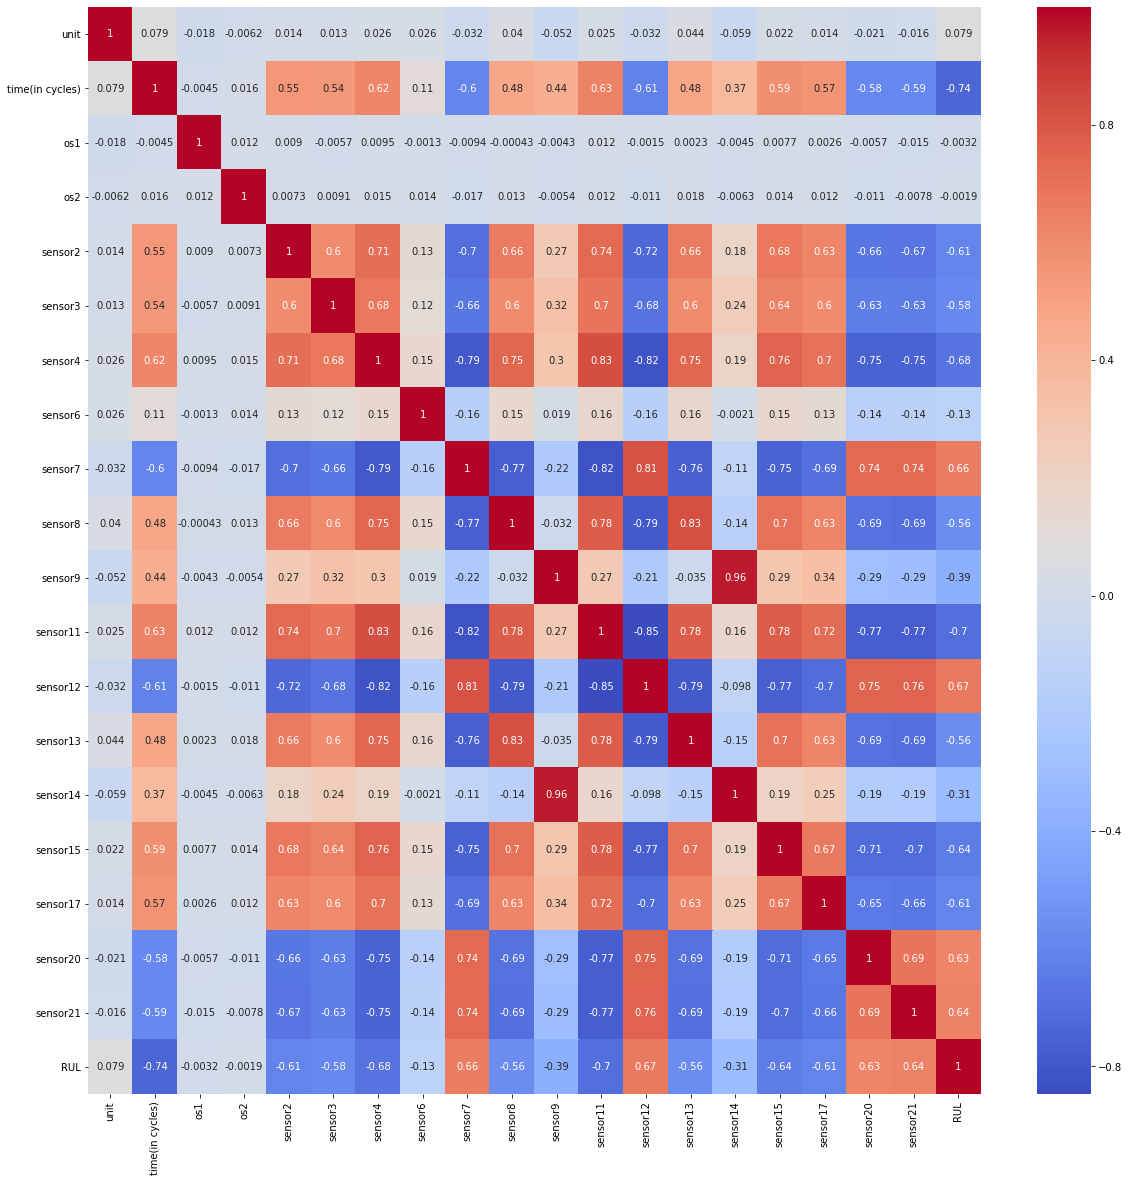

In [1004]:
#We saw that pairplot shows that there were similarity between some of the features so in order to check how much similar they
#were, also the features having less importance on y label
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='coolwarm')

In [1005]:
df.columns

Index(['unit', 'time(in cycles)', 'os1', 'os2', 'sensor2', 'sensor3',
       'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11',
       'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20',
       'sensor21', 'RUL'],
      dtype='object')

In [1006]:
#here after observing the heatmap we discard all the columns which are not showing co-relation with the RUL column
for name in df.columns:
    for names in df.columns:
        matrix = df[[name,names]].corr()
        if(matrix.iloc[1,0]<=0.55): 
            if((matrix.iloc[1,0]>=-0.55) & ((name != 'RUL') & (name != 'unit') & (name != 'os1') & (name != 'os2')) & (names == 'RUL')):
                print(name)
                print(matrix.iloc[1,0])
                drop_to = name
                df.drop(name,axis=1,inplace=True)
                break
drop_to
df.head()

sensor6
-0.128348448474176
sensor9
-0.3901015749180705
sensor14
-0.30676887025758337


unit  time(in cycles)     os1     os2  sensor2  sensor3  sensor4  sensor7  \
0     1                1 -0.0007 -0.0004   641.82  1589.70  1400.60   554.36   
1     1                2  0.0019 -0.0003   642.15  1591.82  1403.14   553.75   
2     1                3 -0.0043  0.0003   642.35  1587.99  1404.20   554.26   
3     1                4  0.0007  0.0000   642.35  1582.79  1401.87   554.45   
4     1                5 -0.0019 -0.0002   642.37  1582.85  1406.22   554.00   

   sensor8  sensor11  sensor12  sensor13  sensor15  sensor17  sensor20  \
0  2388.06     47.47    521.66   2388.02    8.4195       392     39.06   
1  2388.04     47.49    522.28   2388.07    8.4318       392     39.00   
2  2388.08     47.27    522.42   2388.03    8.4178       390     38.95   
3  2388.11     47.13    522.86   2388.08    8.3682       392     38.88   
4  2388.06     47.28    522.19   2388.04    8.4294       393     38.90   

   sensor21  RUL  
0   23.4190  191  
1   23.4236  190  
2   23.3442  189  
3   23.3739  188  
4   23.4044  187

Here we are checking whether columns are having any outliers or not using Boxplot for every available sensor.

In [1007]:
dropped_columns = ["sensor1","sensor5","sensor10","sensor16","sensor18","sensor19","os3","sensor6","sensor9","sensor14"]
df.columns

Index(['unit', 'time(in cycles)', 'os1', 'os2', 'sensor2', 'sensor3',
       'sensor4', 'sensor7', 'sensor8', 'sensor11', 'sensor12', 'sensor13',
       'sensor15', 'sensor17', 'sensor20', 'sensor21', 'RUL'],
      dtype='object')

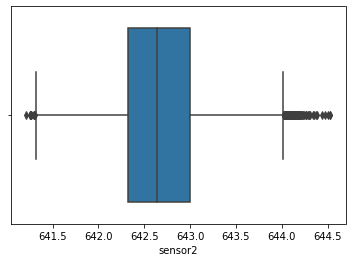

In [1008]:
sns.boxplot(x=df['sensor2'])

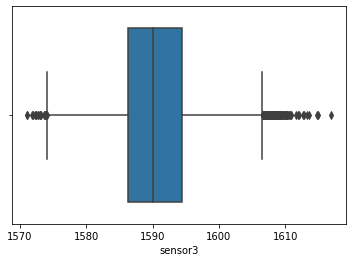

In [1009]:
sns.boxplot(x=df['sensor3'])

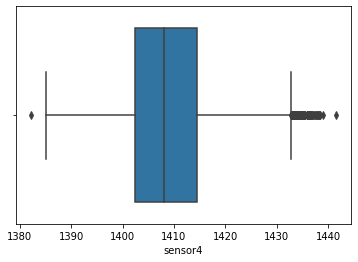

In [1023]:
sns.boxplot(df['sensor4'])

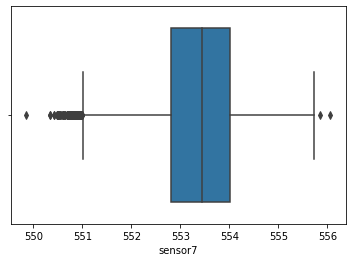

In [1024]:
sns.boxplot(df['sensor7'])

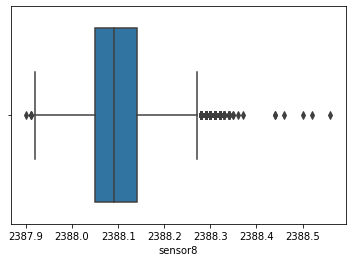

In [1025]:
sns.boxplot(df['sensor8'])

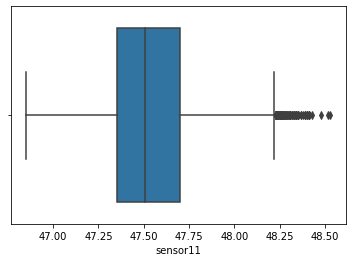

In [1010]:
sns.boxplot(x=df['sensor11'])

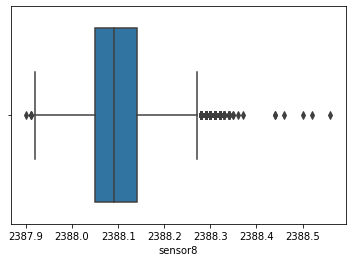

In [1021]:
sns.boxplot(df['sensor8'])

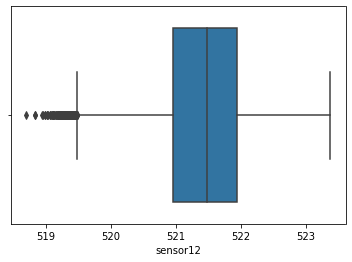

In [1011]:
sns.boxplot(x=df['sensor12'])

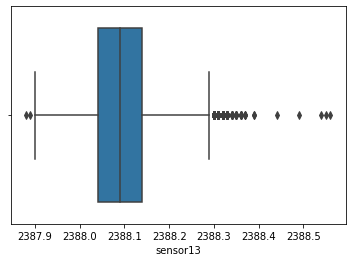

In [1012]:
sns.boxplot(x=df['sensor13'])

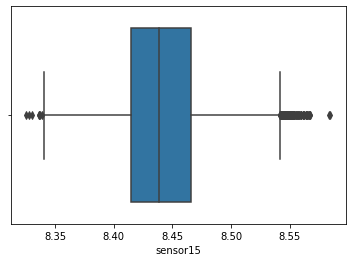

In [1013]:
sns.boxplot(x=df['sensor15'])

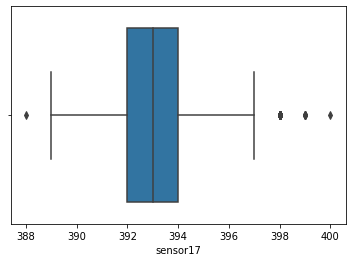

In [1014]:
sns.boxplot(x=df['sensor17'])

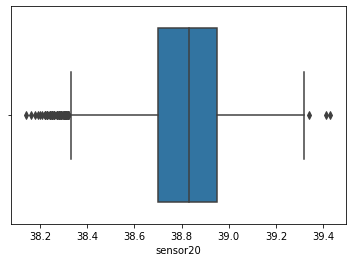

In [1015]:
sns.boxplot(x=df['sensor20'])

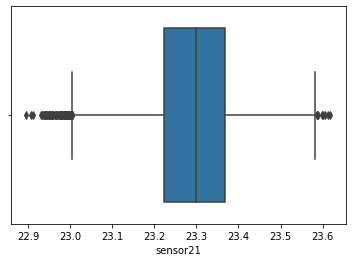

In [1022]:
sns.boxplot(df['sensor21'])

In [977]:
#To remove those outliers we have used Z-Score and stored it in a numpy array
from scipy import stats
z = np.abs(stats.zscore(df))


In [971]:
#Printing the numpy array where the Z-score is greater than 3
threshold = 3
print(np.where(z>3))


(array([  181,   187,   187,   187,   188,   188,   189,   189,   191,
         191,   191,   291,   357,   453,   455,   465,   472,   474,
         475,   478,   654,   656,   656,   657,   657,   826,   837,
         837,   840,   840,   845,   846,   846,   846,  1112,  1112,
        1113,  1268,  1285,  1290,  1294,  1295,  1295,  1296,  1297,
        1297,  1298,  1300,  1301,  1301,  1301,  1301,  1301,  1302,
        1302,  1303,  1303,  1303,  1303,  1303,  1380,  1413,  1534,
        1546,  1555,  1557,  1557,  1560,  1560,  1561,  1562,  1699,
        1705,  1707,  1708,  1709,  1710,  1711,  1712,  1850,  1912,
        1912,  1913,  1913,  1913,  1928,  1941,  1956,  1970,  2126,
        2130,  2134,  2135,  2135,  2185,  2371,  2373,  2461,  2538,
        2543,  2544,  2545,  2696,  2703,  2704,  2708,  2708,  2809,
        2887,  3090,  3091,  3093,  3094,  3094,  3095,  3226,  3287,
        3288,  3293,  3295,  3302,  3303,  3303,  3303,  3327,  3404,
        3577,  3579

In [972]:
df.shape

(20631, 17)

In [973]:
x = pd.DataFrame(z)

In [974]:
#here with the help of z-score we are deleting some rows which will act like an outliers 
df = df[(x<3).all(axis=1)]

In [1016]:
df.shape

(20631, 17)

In [1017]:
df.head()

unit  time(in cycles)     os1     os2  sensor2  sensor3  sensor4  sensor7  \
0     1                1 -0.0007 -0.0004   641.82  1589.70  1400.60   554.36   
1     1                2  0.0019 -0.0003   642.15  1591.82  1403.14   553.75   
2     1                3 -0.0043  0.0003   642.35  1587.99  1404.20   554.26   
3     1                4  0.0007  0.0000   642.35  1582.79  1401.87   554.45   
4     1                5 -0.0019 -0.0002   642.37  1582.85  1406.22   554.00   

   sensor8  sensor11  sensor12  sensor13  sensor15  sensor17  sensor20  \
0  2388.06     47.47    521.66   2388.02    8.4195       392     39.06   
1  2388.04     47.49    522.28   2388.07    8.4318       392     39.00   
2  2388.08     47.27    522.42   2388.03    8.4178       390     38.95   
3  2388.11     47.13    522.86   2388.08    8.3682       392     38.88   
4  2388.06     47.28    522.19   2388.04    8.4294       393     38.90   

   sensor21  RUL  
0   23.4190  191  
1   23.4236  190  
2   23.3442  189  
3   23.3739  188  
4   23.4044  187

In [1018]:
#this is the method which we are thinking to apply in order to know the number of outliers in each column 
#and if those numbers crosses the threshold point then we will discard those features

In [1020]:
for column in df.columns :
    if ( column !='RUL'):
        q25,q75 = np.percentile(df[column],25),np.percentile(df[column],75)
        Iqr = q75-q25
        cutoff = Iqr*1.5
        lower = q25 - cutoff
        upper = q75 + cutoff
        outliers = [x for x in df[column] if x<lower or x>upper]
        print(column)
        print(len(outliers))

unit
0
time(in cycles)
104
os1
105
os2
0
sensor2
128
sensor3
165
sensor4
120
sensor7
110
sensor8
320
sensor11
167
sensor12
146
sensor13
161
sensor15
120
sensor17
81
sensor20
117
sensor21
136


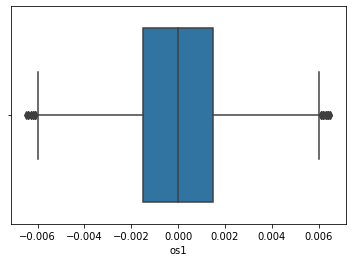

In [987]:
sns.boxplot(x=df['os1'])

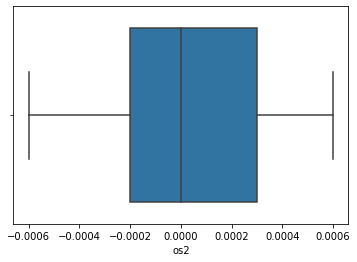

In [986]:
sns.boxplot(x=df['os2'])

In [1026]:
df.columns

Index(['unit', 'time(in cycles)', 'os1', 'os2', 'sensor2', 'sensor3',
       'sensor4', 'sensor7', 'sensor8', 'sensor11', 'sensor12', 'sensor13',
       'sensor15', 'sensor17', 'sensor20', 'sensor21', 'RUL'],
      dtype='object')

In [1027]:
#Here we have loaded our Train Dataset(train_FD001) 
df4 = pd.read_csv("Desktop/test_FD001.txt",sep=" ",header=None)
#There were two columns filled with NaN values so dropping them.
print(df4.columns)
for names in df4.columns:
    
    if (df4[names].isnull().sum() >1):
         df4.drop(names,axis = 1,inplace = True)
#df.drop([26,27],axis = 1,inplace = True)
#The names of the columns were missing, proving headers to the column 
df4.columns = ["unit","time(in cycles)","os1","os2","os3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19","sensor20","sensor21"] 
df4.head()
print(df4.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')
Index(['unit', 'time(in cycles)', 'os1', 'os2', 'os3', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8',
       'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14',
       'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20',
       'sensor21'],
      dtype='object')


In [1030]:
df5 = pd.read_csv("Desktop/RUL_FD001.txt", header = None)
#df5.columns = 'RUL'

In [1051]:
df5.columns = ["RUL"]
df5.head()

RUL
0  112
1   98
2   69
3   82
4   91

In [1045]:
x=df5['RUL']

In [1046]:
type(x)

pandas.core.series.Series

In [1055]:
df4.head()

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
0     1                1  0.0023  0.0003  100.0   518.67   643.02  1585.29   
1     1                2 -0.0027 -0.0003  100.0   518.67   641.71  1588.45   
2     1                3  0.0003  0.0001  100.0   518.67   642.46  1586.94   
3     1                4  0.0042  0.0000  100.0   518.67   642.44  1584.12   
4     1                5  0.0014  0.0000  100.0   518.67   642.51  1587.19   

   sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  sensor16  \
0  1398.21    14.62  ...    521.72   2388.03   8125.55    8.4052      0.03   
1  1395.42    14.62  ...    522.16   2388.06   8139.62    8.3803      0.03   
2  1401.34    14.62  ...    521.97   2388.03   8130.10    8.4441      0.03   
3  1406.42    14.62  ...    521.38   2388.05   8132.90    8.3917      0.03   
4  1401.92    14.62  ...    522.15   2388.03   8129.54    8.4031      0.03   

   sensor17  sensor18  sensor19  sensor20  sensor21  
0       392      2388     100.0     38.86   23.3735  
1       393      2388     100.0     39.02   23.3916  
2       393      2388     100.0     39.08   23.4166  
3       391      2388     100.0     39.00   23.3737  
4       390      2388     100.0     38.99   23.4130  

[5 rows x 26 columns]

In [1116]:
#df.groupby(['unit'])['time(in cycles)'].transform(max)-df['time(in cycles)']
m=1
m2=pd.core.series.Series() 
i=0
for i in range(100):
    #df4.groupby(['unit'])['RUL'] = df5.iloc(i)
    dx = df4[df4['unit']==m]
    m1 = x.iloc[i]+dx['time(in cycles)']
    m2=m2.append(m1)
    m=m+1

In [1117]:
m2.head()

0    113
1    114
2    115
3    116
4    117
dtype: int64

In [1112]:
df4['RUL']=m2-df4['time(in cycles)']

df4.head()

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
0     1                1  0.0023  0.0003  100.0   518.67   643.02  1585.29   
1     1                2 -0.0027 -0.0003  100.0   518.67   641.71  1588.45   
2     1                3  0.0003  0.0001  100.0   518.67   642.46  1586.94   
3     1                4  0.0042  0.0000  100.0   518.67   642.44  1584.12   
4     1                5  0.0014  0.0000  100.0   518.67   642.51  1587.19   

   sensor4  sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0  1398.21    14.62  ...   2388.03   8125.55    8.4052      0.03       392   
1  1395.42    14.62  ...   2388.06   8139.62    8.3803      0.03       393   
2  1401.34    14.62  ...   2388.03   8130.10    8.4441      0.03       393   
3  1406.42    14.62  ...   2388.05   8132.90    8.3917      0.03       391   
4  1401.92    14.62  ...   2388.03   8129.54    8.4031      0.03       390   

   sensor18  sensor19  sensor20  sensor21  RUL  
0      2388     100.0     38.86   23.3735  112  
1      2388     100.0     39.02   23.3916  112  
2      2388     100.0     39.08   23.4166  112  
3      2388     100.0     39.00   23.3737  112  
4      2388     100.0     38.99   23.4130  112  

[5 rows x 27 columns]

In [1126]:
df4['RUK'] = df4.groupby(['unit'])['time(in cycles)'].transform(max)+df4['RUL']-df4['time(in cycles)']

In [1129]:
df4[df4['unit']==2]

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  sensor3  \
31     2                1 -0.0009  0.0004  100.0   518.67   642.66  1589.30   
32     2                2 -0.0011  0.0002  100.0   518.67   642.51  1588.43   
33     2                3  0.0002  0.0003  100.0   518.67   642.58  1595.60   
34     2                4  0.0025  0.0001  100.0   518.67   642.31  1583.43   
35     2                5  0.0004 -0.0004  100.0   518.67   642.77  1585.03   
36     2                6 -0.0008 -0.0003  100.0   518.67   642.50  1579.87   
37     2                7  0.0019  0.0000  100.0   518.67   642.63  1594.28   
38     2                8  0.0015  0.0003  100.0   518.67   642.61  1583.23   
39     2                9 -0.0022  0.0003  100.0   518.67   642.28  1588.74   
40     2               10  0.0021  0.0004  100.0   518.67   642.53  1590.87   
41     2               11 -0.0010  0.0000  100.0   518.67   642.57  1594.61   
42     2               12  0.0022 -0.0001  100.0   518.67   642.70  1599.04   
43     2               13  0.0034  0.0001  100.0   518.67   642.35  1583.94   
44     2               14 -0.0013  0.0000  100.0   518.67   642.46  1589.62   
45     2               15 -0.0009  0.0000  100.0   518.67   642.33  1582.15   
46     2               16  0.0018 -0.0002  100.0   518.67   642.54  1588.49   
47     2               17 -0.0012  0.0005  100.0   518.67   641.91  1583.24   
48     2               18  0.0005  0.0001  100.0   518.67   642.45  1596.19   
49     2               19  0.0005 -0.0000  100.0   518.67   642.37  1595.07   
50     2               20  0.0039  0.0004  100.0   518.67   642.72  1589.15   
51     2               21 -0.0038 -0.0003  100.0   518.67   642.32  1590.72   
52     2               22  0.0005  0.0003  100.0   518.67   642.44  1585.48   
53     2               23 -0.0003  0.0003  100.0   518.67   642.69  1591.13   
54     2               24  0.0010 -0.0004  100.0   518.67   643.17  1590.83   
55     2               25  0.0014 -0.0004  100.0   518.67   643.33  1590.17   
56     2               26  0.0012  0.0001  100.0   518.67   642.51  1587.04   
57     2               27 -0.0009  0.0004  100.0   518.67   642.54  1596.98   
58     2               28 -0.0008 -0.0000  100.0   518.67   642.16  1592.33   
59     2               29 -0.0015 -0.0004  100.0   518.67   642.43  1581.85   
60     2               30  0.0015  0.0004  100.0   518.67   642.75  1583.78   
61     2               31  0.0003  0.0002  100.0   518.67   642.77  1591.32   
62     2               32  0.0032  0.0002  100.0   518.67   642.78  1594.31   
63     2               33 -0.0006 -0.0003  100.0   518.67   642.53  1592.58   
64     2               34 -0.0033  0.0001  100.0   518.67   642.43  1582.25   
65     2               35 -0.0033 -0.0001  100.0   518.67   642.89  1597.36   
66     2               36 -0.0017  0.0001  100.0   518.67   642.23  1584.89   
67     2               37  0.0004 -0.0001  100.0   518.67   643.20  1581.90   
68     2               38 -0.0029 -0.0001  100.0   518.67   642.62  1588.47   
69     2               39  0.0002  0.0004  100.0   518.67   642.98  1591.62   
70     2               40  0.0023  0.0003  100.0   518.67   642.65  1590.33   
71     2               41 -0.0001 -0.0002  100.0   518.67   642.78  1595.98   
72     2               42 -0.0039 -0.0002  100.0   518.67   642.74  1586.43   
73     2               43  0.0014  0.0001  100.0   518.67   642.82  1588.40   
74     2               44 -0.0023  0.0003  100.0   518.67   642.77  1591.75   
75     2               45 -0.0029  0.0000  100.0   518.67   642.48  1590.52   
76     2               46  0.0026 -0.0002  100.0   518.67   642.84  1589.31   
77     2               47 -0.0029 -0.0004  100.0   518.67   642.85  1587.58   
78     2               48  0.0011 -0.0001  100.0   518.67   642.64  1587.71   
79     2               49  0.0018 -0.0001  100.0   518.67   642.55  1586.59   

    sensor4  sensor5  ...  sensor14  sensor15  sensor

In [1130]:
df4[df4['unit']==100]

unit  time(in cycles)     os1     os2    os3  sensor1  sensor2  \
12898   100                1  0.0014  0.0003  100.0   518.67   641.65   
12899   100                2  0.0031  0.0001  100.0   518.67   642.20   
12900   100                3 -0.0000  0.0001  100.0   518.67   642.27   
12901   100                4  0.0011  0.0001  100.0   518.67   642.07   
12902   100                5 -0.0011  0.0005  100.0   518.67   642.01   
12903   100                6  0.0008 -0.0002  100.0   518.67   642.41   
12904   100                7 -0.0014  0.0000  100.0   518.67   641.90   
12905   100                8  0.0033 -0.0004  100.0   518.67   641.92   
12906   100                9  0.0011  0.0004  100.0   518.67   642.81   
12907   100               10  0.0032  0.0004  100.0   518.67   641.86   
12908   100               11 -0.0051  0.0004  100.0   518.67   642.27   
12909   100               12 -0.0014 -0.0004  100.0   518.67   642.24   
12910   100               13 -0.0029  0.0003  100.0   518.67   641.73   
12911   100               14 -0.0014  0.0005  100.0   518.67   642.88   
12912   100               15 -0.0007  0.0003  100.0   518.67   642.57   
12913   100               16 -0.0024  0.0002  100.0   518.67   641.88   
12914   100               17  0.0011  0.0001  100.0   518.67   642.51   
12915   100               18 -0.0003  0.0003  100.0   518.67   642.01   
12916   100               19  0.0008 -0.0003  100.0   518.67   642.33   
12917   100               20 -0.0001 -0.0003  100.0   518.67   642.42   
12918   100               21  0.0019  0.0004  100.0   518.67   641.68   
12919   100               22  0.0007 -0.0003  100.0   518.67   642.12   
12920   100               23 -0.0017 -0.0003  100.0   518.67   642.58   
12921   100               24  0.0006  0.0002  100.0   518.67   642.63   
12922   100               25 -0.0029 -0.0003  100.0   518.67   642.03   
12923   100               26 -0.0010 -0.0002  100.0   518.67   641.94   
12924   100               27 -0.0009 -0.0002  100.0   518.67   642.26   
12925   100               28 -0.0023  0.0002  100.0   518.67   641.92   
12926   100               29 -0.0014  0.0005  100.0   518.67   642.50   
12927   100               30 -0.0008 -0.0004  100.0   518.67   642.28   
...     ...              ...     ...     ...    ...      ...      ...   
13066   100              169  0.0026 -0.0000  100.0   518.67   642.36   
13067   100              170 -0.0006 -0.0004  100.0   518.67   642.70   
13068   100              171 -0.0026 -0.0003  100.0   518.67   642.83   
13069   100              172  0.0007  0.0003  100.0   518.67   642.61   
13070   100              173 -0.0003 -0.0000  100.0   518.67   642.56   
13071   100              174 -0.0005  0.0003  100.0   518.67   642.81   
13072   100              175  0.0019  0.0000  100.0   518.67   642.25   
13073   100              176  0.0002  0.0002  100.0   518.67   642.73   
13074   100              177 -0.0041 -0.0003  100.0   518.67   642.80   
13075   100              178  0.0001  0.0005  100.0   518.67   642.32   
13076   100              179  0.0041  0.0001  100.0   518.67   642.30   
13077   100              180 -0.0004  0.0001  100.0   518.67   642.65   
13078   100              181 -0.0010  0.0000  100.0   518.67   642.94   
13079   100              182 -0.0027 -0.0001  100.0   518.67   642.28   
13080   100              183  0.0009  0.0001  100.0   518.67   642.78   
13081   100              184  0.0001 -0.0004  100.0   518.67   642.60   
13082   100              185  0.0032  0.0004  100.0   518.67   642.84   
13083   100              186 -0.0025  0.0005  100.0   518.67   643.38   
13084   100              187  0.0019  0.0002  100.0   518.67   642.40   
13085   100              188  0.0010  0.0005  100.0   518.67   643.35   
13086   100              189 -0.0003  0.0002  100.0   518.67   643.29   
13087   100              190 -0.0038  0.0002  100.0   518.67   642.95   
13088   100              191 -0.0031 -0.0001  100.0   518.67   64

# Conclusion: 

After doing this much EDA we have found that above features are important as of now. We have done only for one DataSet having CONDITION: ONE (Sea Level), there are basically two pairs of dataset having same conditions (ONE and SIX).
with the help EDA visualize and found out that this much features are important for CONDITION: ONE(Sea Level) dataset.
We are also looking forward to perform EDA on CONDITION: SIX and after that we are going to build model which will be able to predict the RUL from the test dataset.